In [3]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import animation
plt.rcParams['animation.embed_limit'] = 2**128
from IPython import display

In [4]:
n = 32
q = 0.3
A = (np.random.random(size = (n, n)) <= q).astype(int)
A[0] = 5
A

array([[5, 5, 5, ..., 5, 5, 5],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1]])

In [5]:
n = 32
q = 0.3
A = (np.random.random(size = (n - 1, n)) <= q).astype(int)
A = np.vstack([[5]*n, A])
A

array([[5, 5, 5, ..., 5, 5, 5],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 1]])

In [6]:
A.shape

(32, 32)

In [7]:
w = np.array([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]
    ])

In [8]:
signal.correlate2d(A, w, mode='same')

array([[ 5, 11, 10, ..., 10, 11,  5],
       [ 6,  5,  7, ...,  7,  6,  6],
       [ 0,  1,  1, ...,  2,  1,  2],
       ...,
       [ 1,  1,  0, ...,  2,  1,  1],
       [ 0,  0,  1, ...,  1,  1,  2],
       [ 0,  1,  1, ...,  0,  2,  0]])

In [9]:
A == 1

array([[False, False, False, ..., False, False, False],
       [False,  True, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       [False, False,  True, ..., False, False,  True]])

In [10]:
c = signal.correlate2d(A, w, mode='same')
c

array([[ 5, 11, 10, ..., 10, 11,  5],
       [ 6,  5,  7, ...,  7,  6,  6],
       [ 0,  1,  1, ...,  2,  1,  2],
       ...,
       [ 1,  1,  0, ...,  2,  1,  1],
       [ 0,  0,  1, ...,  1,  1,  2],
       [ 0,  1,  1, ...,  0,  2,  0]])

In [11]:
A[(A==1)&(c>=5)]=5
A

array([[5, 5, 5, ..., 5, 5, 5],
       [0, 5, 0, ..., 0, 5, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 1]])

In [12]:
def paso_percolacion(A):
    c = signal.correlate2d(A, w, mode='same')
    A[(A==1)&(c>=5)]=5

In [13]:
def animate(i):
    A = imagen.get_array()
    r = 0.1
    A = A + r*(signal.correlate2d(A, w, mode='same'))
    imagen.set_array(A)

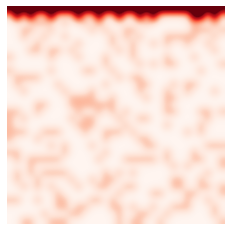

In [14]:
# crear figura
fig, ax = plt.subplots()
ax.set_axis_off()
imagen = ax.imshow(A, cmap='Reds', interpolation='bicubic')
anim = animation.FuncAnimation(fig, animate, frames=1000, interval=10000/12)

In [ ]:
display.display_html(anim.to_jshtml(), raw=True)

In [ ]:
kw = {'a':1, 'b':2}
#f(**kw)

In [ ]:
def concentrar(A, altura=0.1, factor=20):
    m, n = A.shape
    radio = (min(m, n) - 1)//20 + 1
    h, k = m//2, n//2
    A[h-radio:h+radio, k-radio:k+radio] += altura

In [ ]:
A = np.zeros((100, 100))
#concentrar(A)

n, m, ruido = 100, 100, 0.1
ra, rb, f, k = 0.5, 0.25, 0.039, 0.065

A = np.ones((n, m), dtype = float)
B = ruido * np.random.random((n, m))
concentrar(B)

def transicion(i):
    global A, B, dt
    reaccion = A * B**2
    for i in range(16):
        A += ra * signal.correlate2d(A, w, mode='same', boundary='wrap') - reaccion + f * (1 - A)
        B += rb * signal.correlate2d(B, w, mode='same', boundary='wrap') + reaccion - (f + k) * B
    imagenA.set_array(A)
    imagenB.set_array(B)

In [ ]:
# crear figura
fig, ax = plt.subplots(figsize=(7,7))
ax.set_axis_off()
imagenA = ax.imshow(A, cmap='Reds', interpolation='bicubic')
imagenB = ax.imshow(B, cmap='Blues', interpolation='bicubic')
anim = animation.FuncAnimation(fig, transicion, frames=1000, interval=1000/24)

In [ ]:
ax.set_axis_off()
display.display_html(anim.to_jshtml(), raw=True)